In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("example.csv")

In [3]:
df.head()

,DateTime,Utilization Rate(Gbps),Downstream Bandwidth Utilized
0,2021-01-30 00:00 Sat,0.019,8.73
1,2021-01-30 01:00 Sat,0.014,6.13
2,2021-01-30 02:00 Sat,0.007,3.12
3,2021-01-30 03:00 Sat,0.001,0.25
4,2021-01-30 04:00 Sat,0.001,0.41


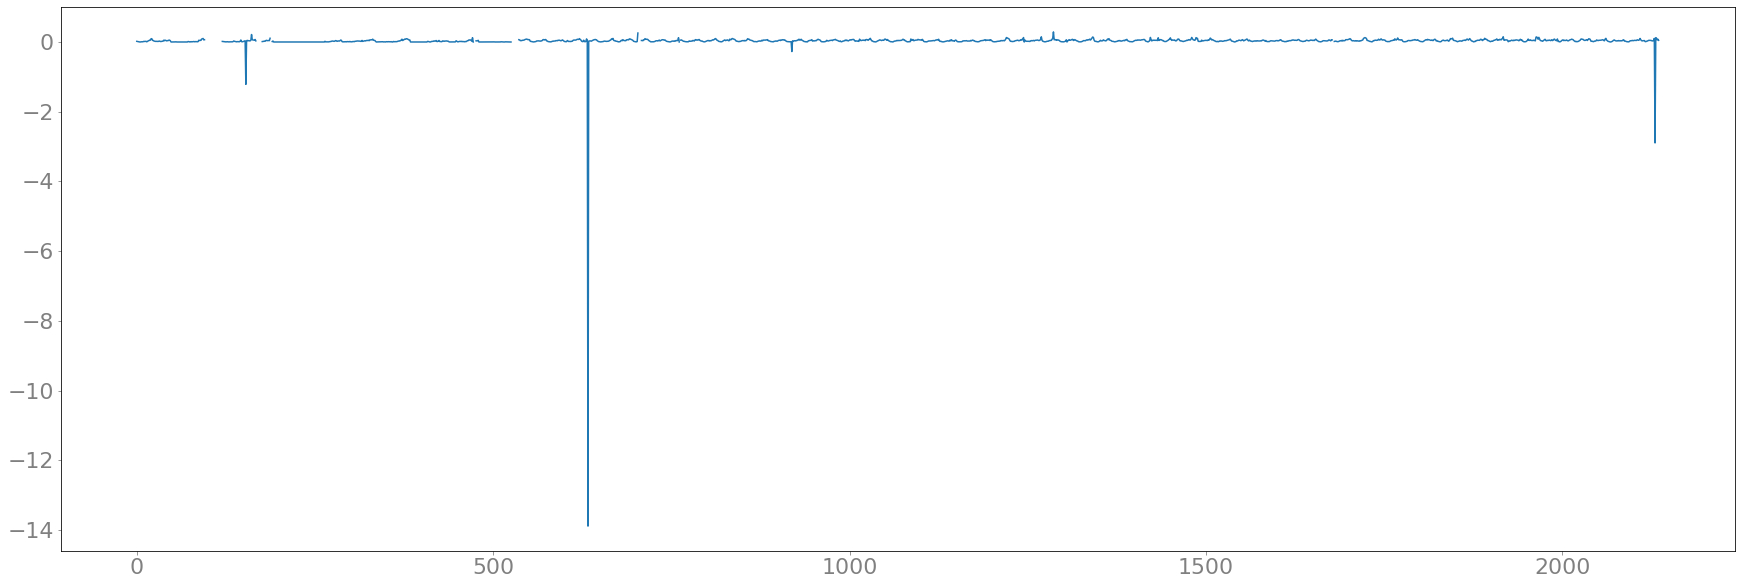

In [4]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(df["Utilization Rate(Gbps)"])
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
plt.show()

In [5]:
df.loc[df["Utilization Rate(Gbps)"]<=0, "Utilization Rate(Gbps)"] = np.nan

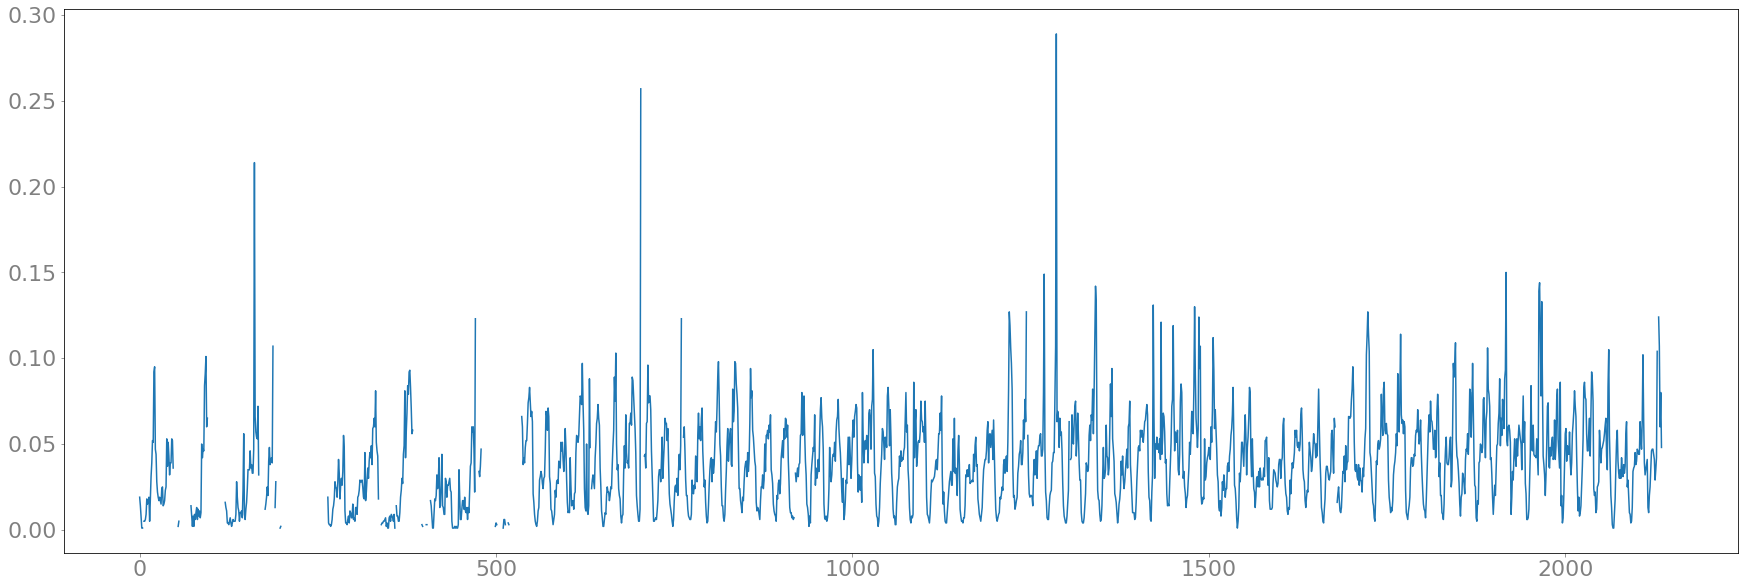

In [6]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(df["Utilization Rate(Gbps)"])
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
plt.show()

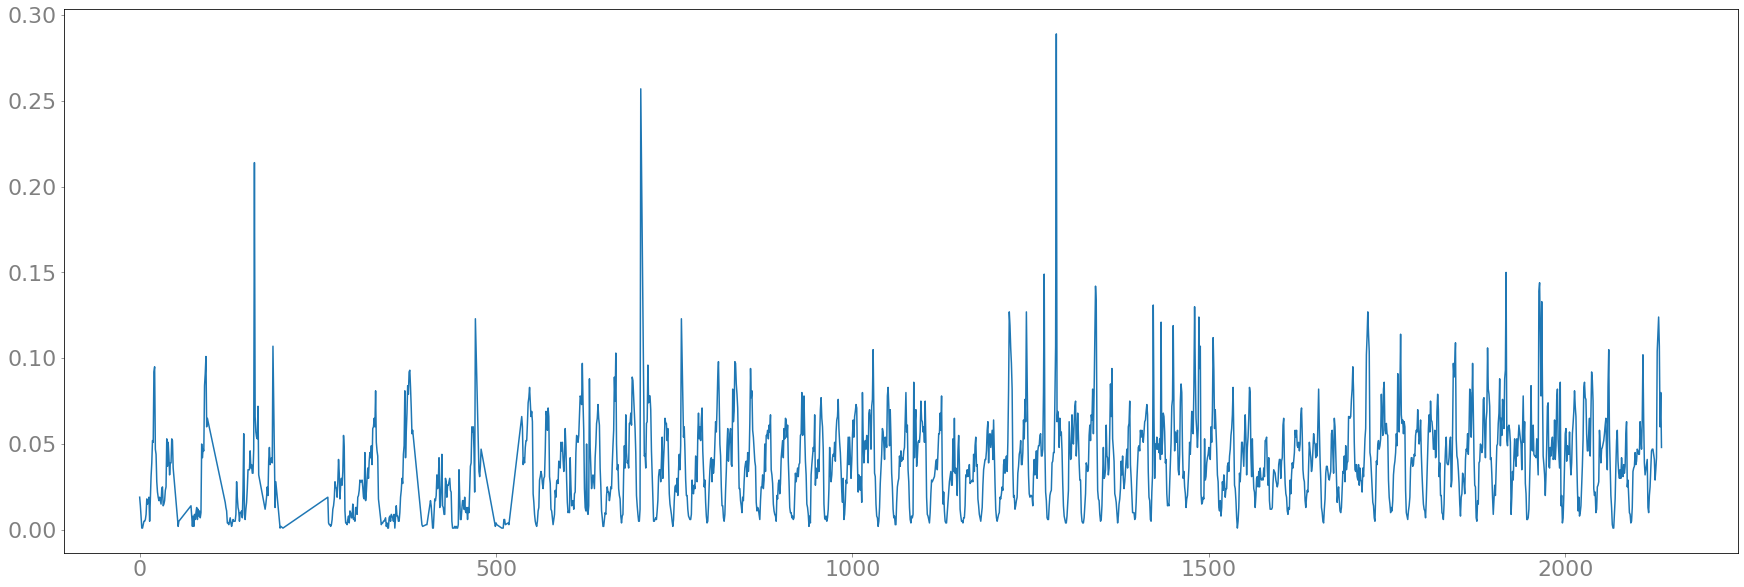

In [7]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(df["Utilization Rate(Gbps)"].interpolate())
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
plt.show()

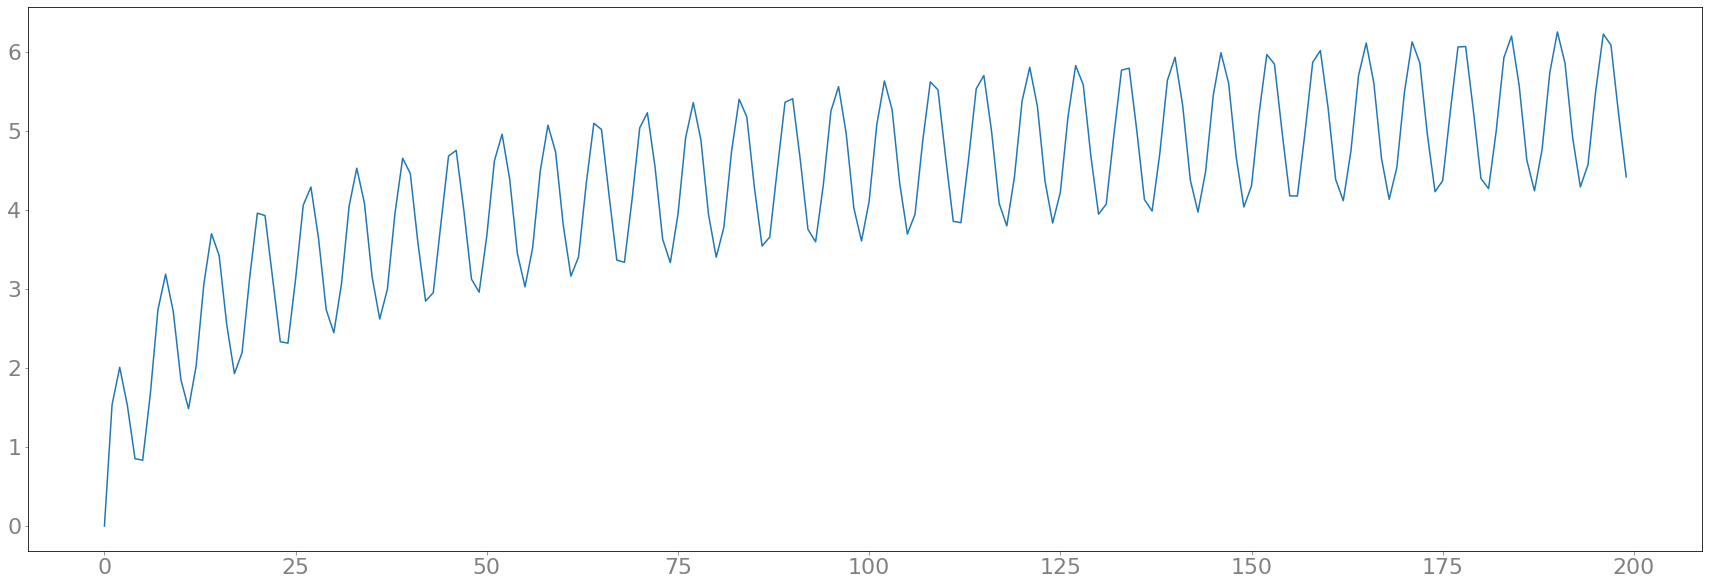

In [8]:
x = np.sin(np.arange(200))+np.log(np.arange(1, 201))
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(x)
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
plt.show()

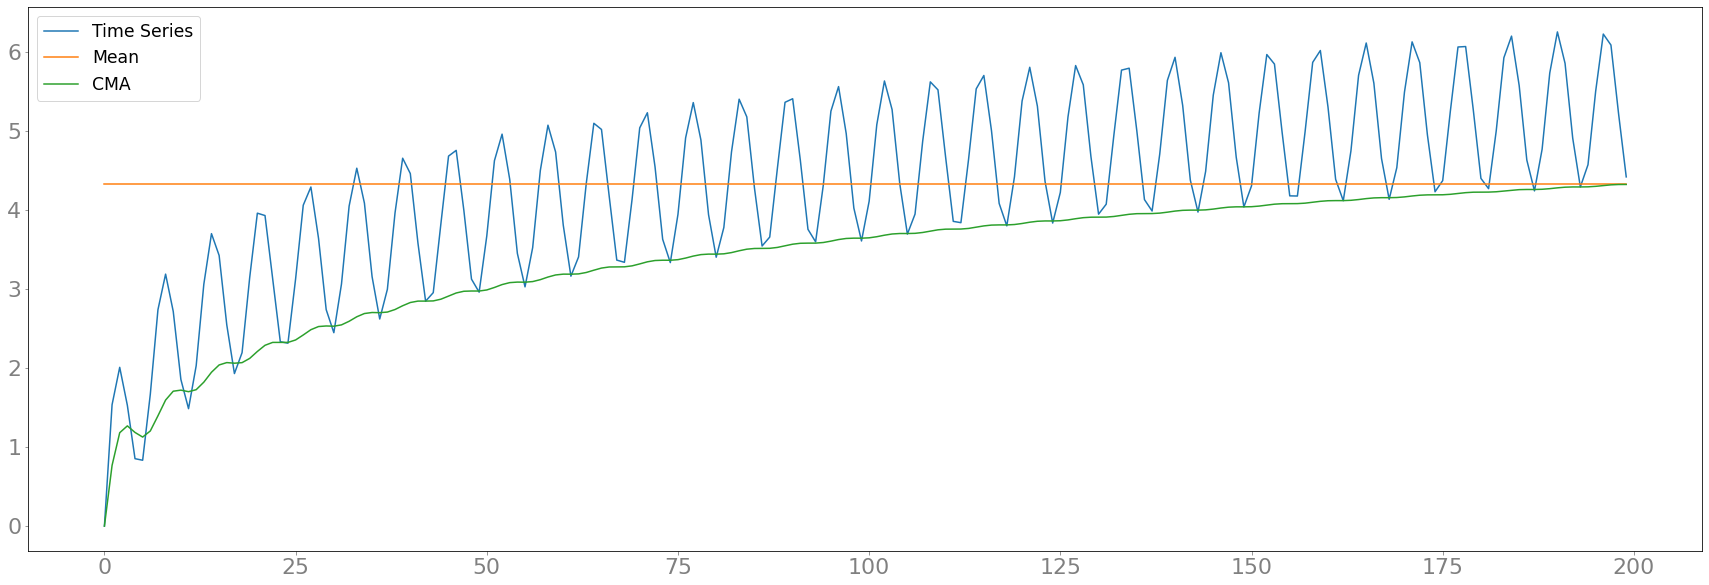

In [9]:
x = pd.Series(np.sin(np.arange(200))+np.log(np.arange(1, 201)))
x_mean = np.array([x.mean()]*len(x))
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(x, label="Time Series")
ax.plot(x_mean, label="Mean")
ax.plot(x.expanding().mean(), label="CMA")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

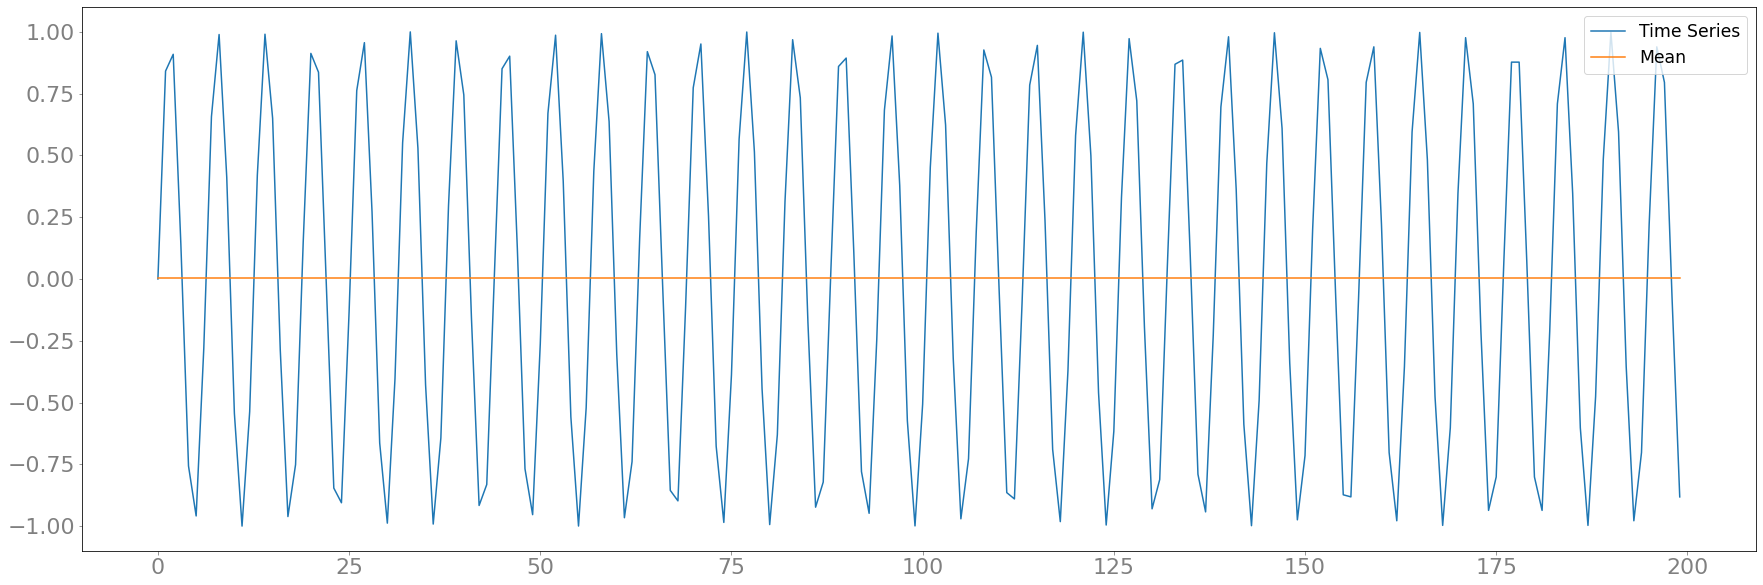

In [10]:
x = pd.Series(np.sin(np.arange(200)))
x_mean = np.array([x.mean()]*len(x))
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(x, label="Time Series")
ax.plot(x_mean, label="Mean")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

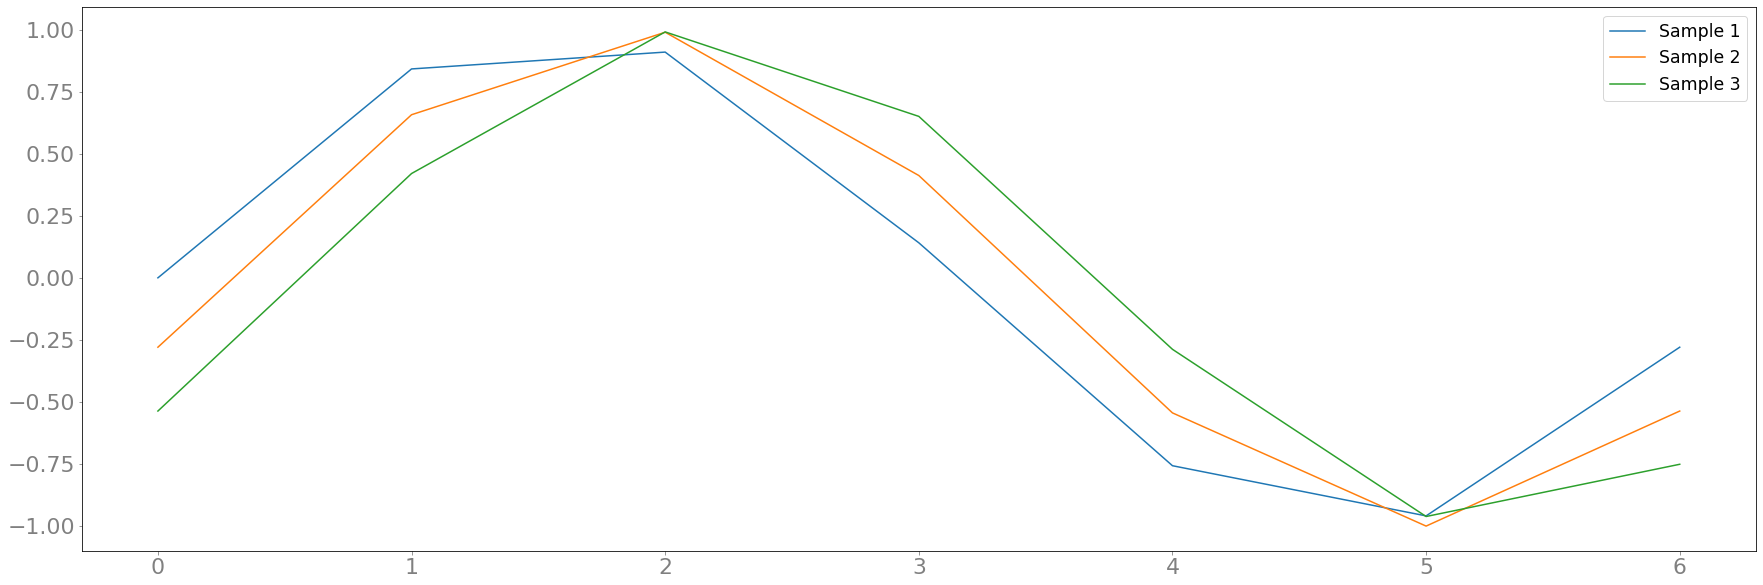

In [11]:
x = pd.Series(np.sin(np.arange(200)))
s1 = x[:7]
s2 = x[6:13]
s3 = x[12:19]
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(7), s1, label="Sample 1")
ax.plot(np.arange(7), s2, label="Sample 2")
ax.plot(np.arange(7), s3, label="Sample 3")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack, arange, fft
import matplotlib.ticker as mticker

In [13]:
def annot_max(x, y, pos=0.96, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    text = f"x={xmax:.3f}, y={ymax:.3f}, (period: {(1./xmax):.2f} time-unit)"
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax),  xytext=(0.94, pos), **kw)

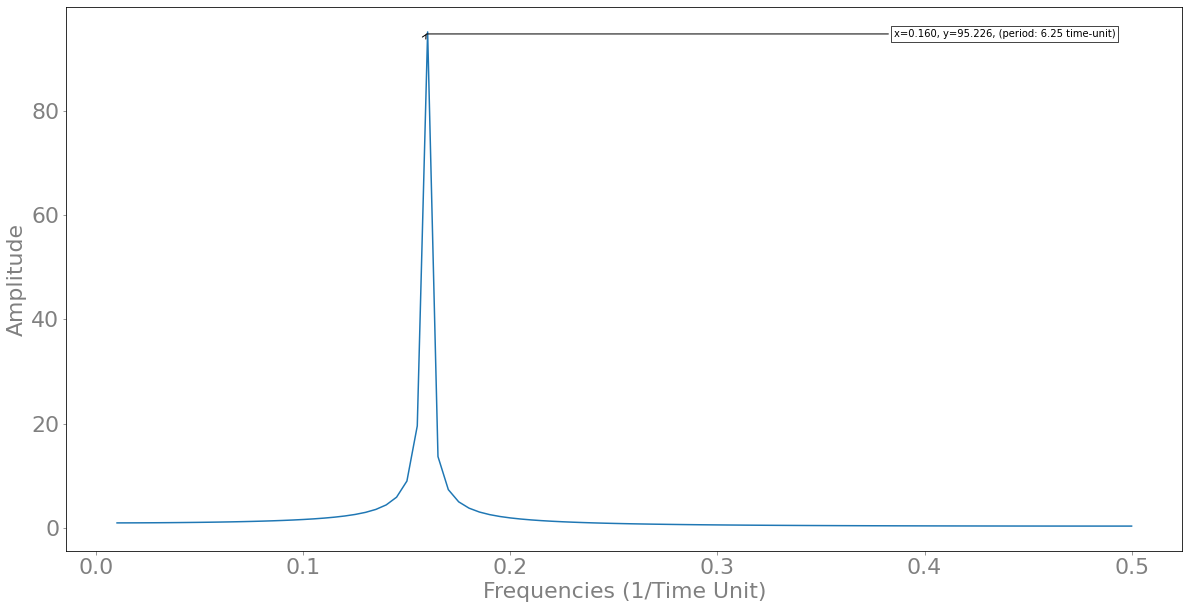

In [14]:
x = pd.Series(np.sin(np.arange(200)))
nobs = len(x)
fourier = np.abs(rfft(x))
frequencies = rfftfreq(nobs)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.plot(frequencies[2:], fourier[2:])
annot_max(frequencies[2:], fourier[2:])
ax.set_xlabel("Frequencies (1/Time Unit)", color='grey', size=22)
ax.set_ylabel("Amplitude", color='grey', size=22)
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
plt.show()

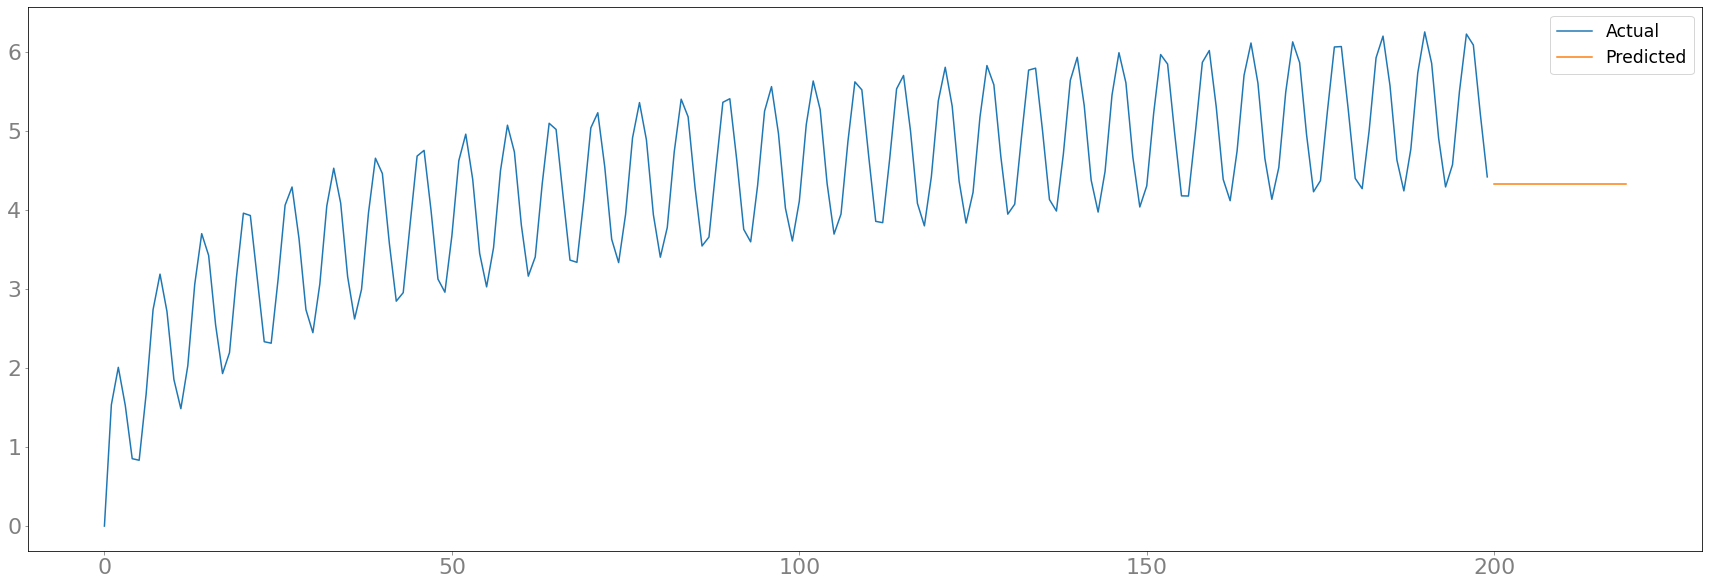

In [15]:
x = np.sin(np.arange(200))+np.log(np.arange(1, 201))
x_mean = np.array([x.mean()]*20)
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(x)), x, label="Actual")
ax.plot(np.arange(len(x), len(x)+len(x_mean)), x_mean, label="Predicted")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

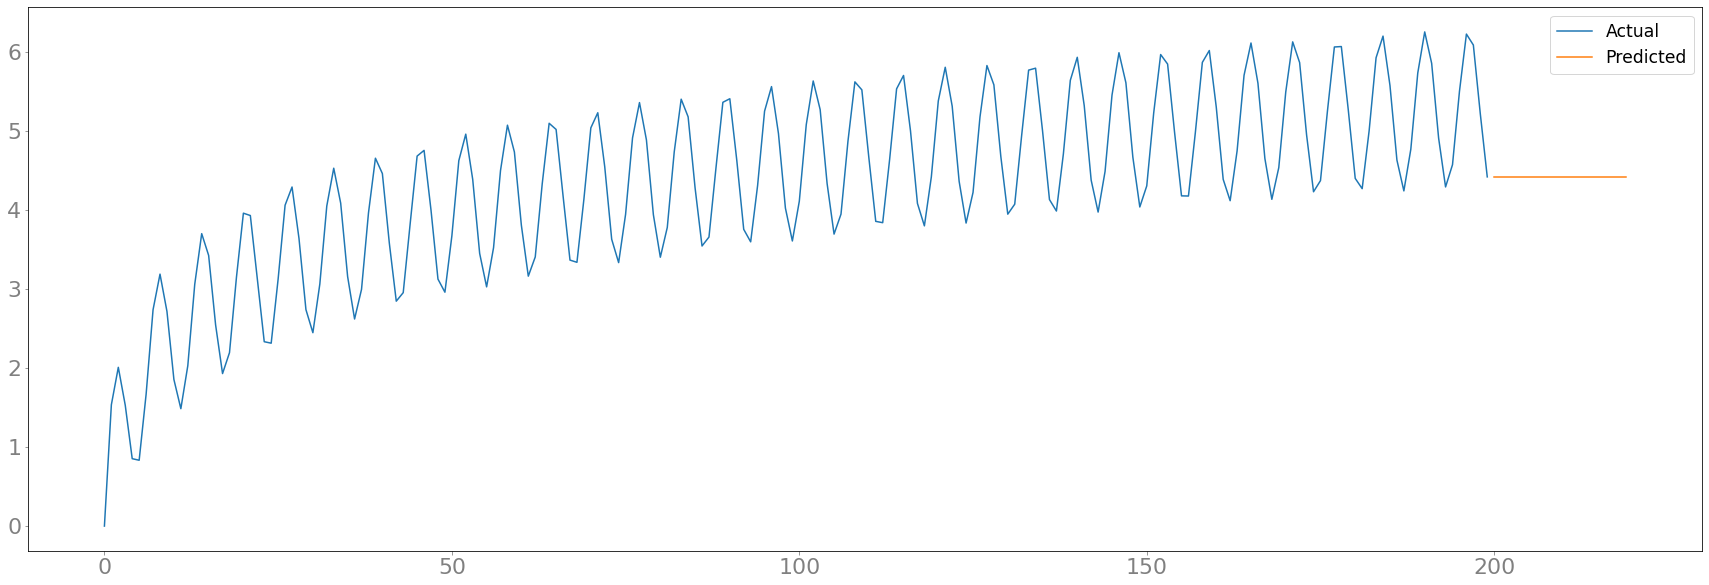

In [16]:
x = np.sin(np.arange(200))+np.log(np.arange(1, 201))
x_naive = [x[len(x)-1]]*20
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(x)), x, label="Actual")
ax.plot(np.arange(len(x), len(x)+len(x_naive)), x_naive, label="Predicted")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

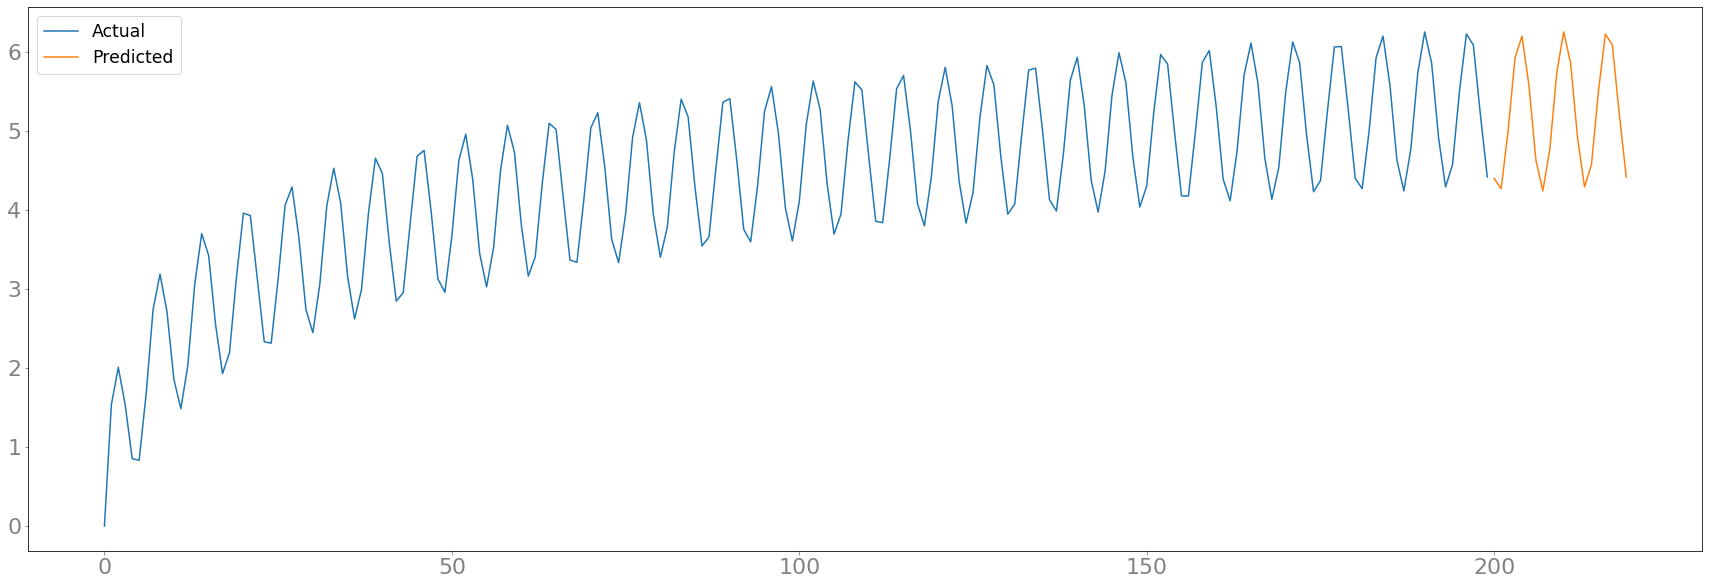

In [17]:
x = np.sin(np.arange(200))+np.log(np.arange(1, 201))
x_snaive = x[-20:]
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(x)), x, label="Actual")
ax.plot(np.arange(len(x), len(x)+len(x_snaive)), x_snaive, label="Predicted")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

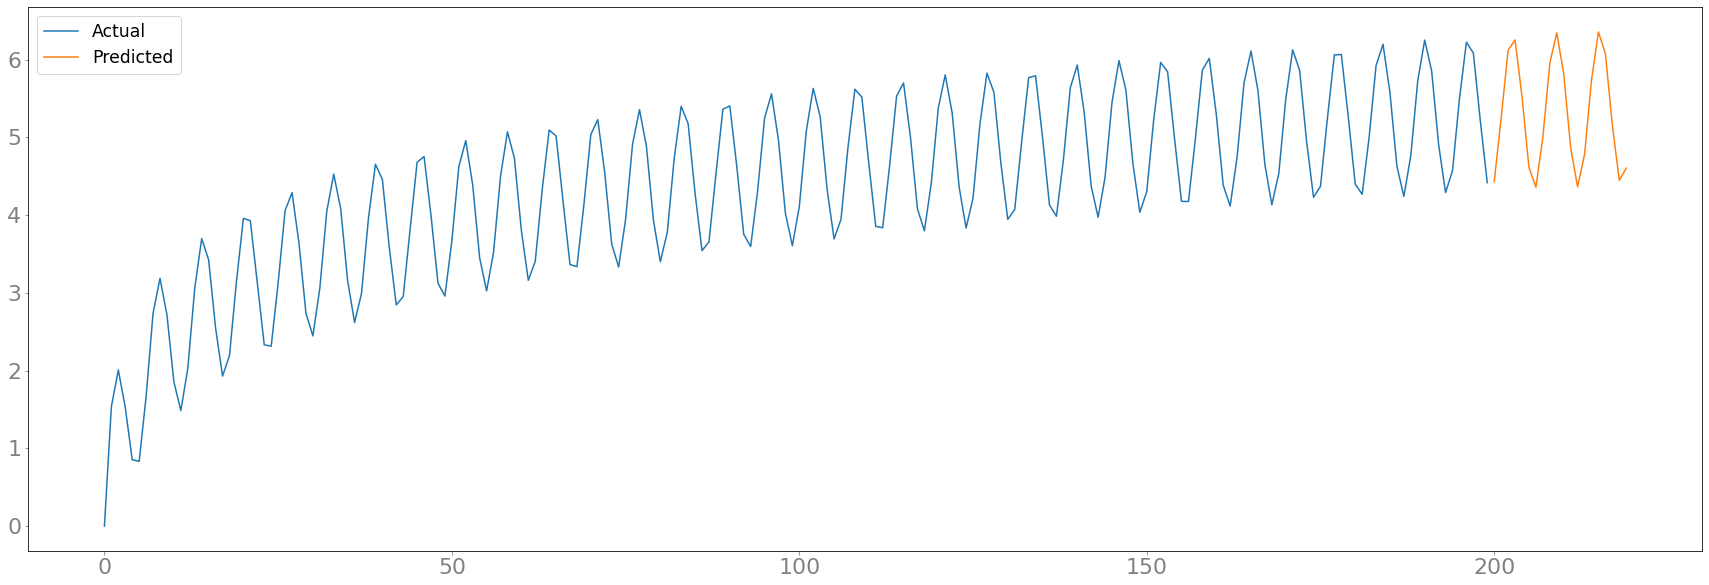

In [18]:
x = np.sin(np.arange(200))+np.log(np.arange(1, 201))
x_novel = np.sin(np.arange(200, 220))+np.log(np.arange(201, 221))
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(x)), x, label="Actual")
ax.plot(np.arange(len(x), len(x)+len(x_novel)), x_novel, label="Predicted")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

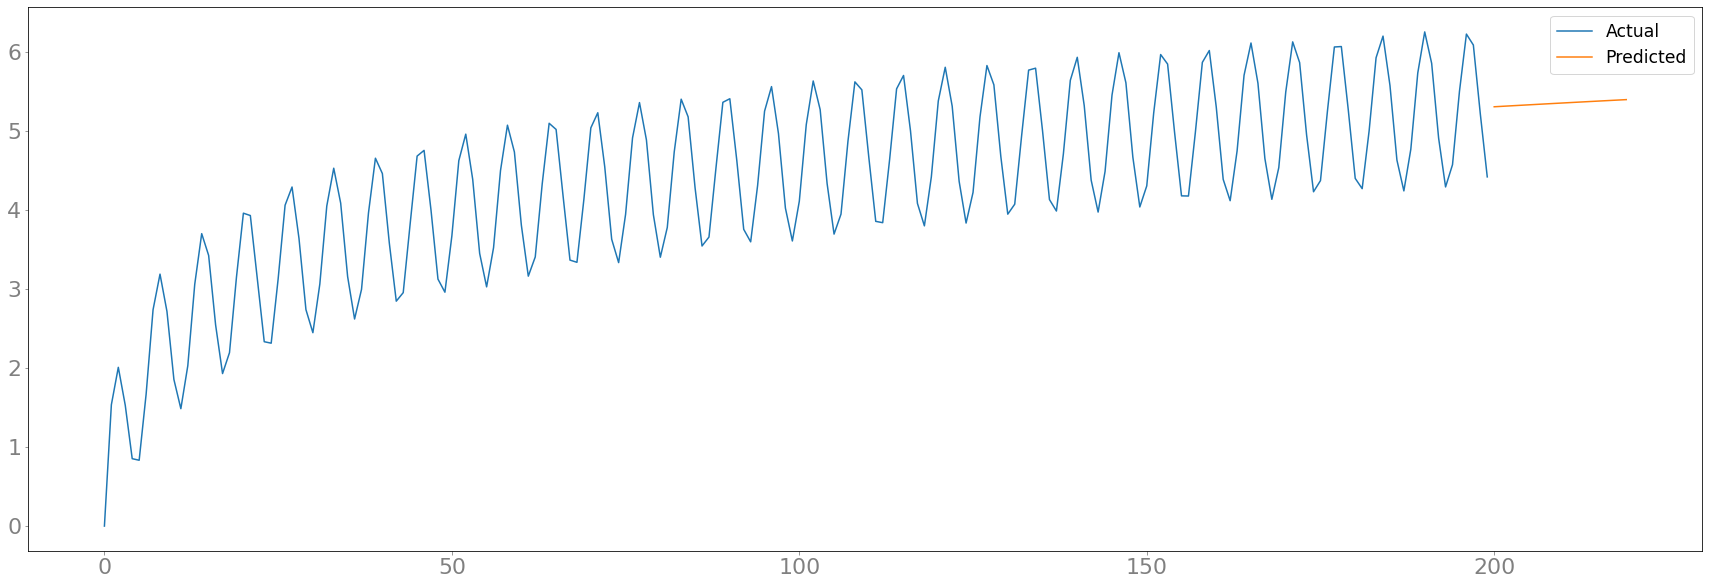

In [29]:
x = np.sin(np.arange(200))+np.log(np.arange(1, 201))
x_drift = np.log(np.arange(201, 221))
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(x)), x, label="Actual")
ax.plot(np.arange(len(x), len(x)+len(x_drift)), x_drift, label="Predicted")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()